<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">K-Nearest Neighbor (Breast Cancer Dataset)</h3>
    <h4 align="center"><a href="http://www.iran-machinelearning.ir">Soheil Tehranipour</a></h5>
</div>

- [ ] What is KNN?
- [ ] Breast Cancer Dataset
- [ ] How to use optimal K?

## What is K-Nearest Neighbor (KNN)?

K-Nearest Neighbors, or **KNN** for short, is one of the simplest machine learning algorithms and is used in a wide array of institutions. KNN is a `non-parametric`, `lazy learning` algorithm.



* When we say a technique is non-parametric, it means that it does not make any assumptions about the underlying data. In other words, it makes its selection based off of the proximity to other data points regardless of what feature the numerical values represent. 

* Being a lazy learning algorithm implies that there is little to no training phase. Therefore, we can immediately classify new data points as they present themselves.

> K-NN is a lazy learner because it doesn’t learn a discriminative function from the training data but “memorizes” the training dataset instead.
For example, the logistic regression algorithm learns its model weights (parameters) during training time. In contrast, there is no training time in K-NN.

**To summarize: An eager learner has a model fitting or training step. A lazy learner does not have a training phase.**

<img src = "https://miro.medium.com/max/1400/1*YWKvGH4kKOtCvlX950LM9g.jpeg" width=75%>

## KNN in a nutshell

1.     Pick a value for K (i.e. 5).

<img src = "https://miro.medium.com/max/1400/1*4F-q86XFr2-EsaAcz0Zu5A.png" width=50%>


3. Among these neighbors, count the number of data points in each category and assign the new data point to the category where you counted the most neighbors.

<img src = "https://miro.medium.com/max/1400/1*OMHr6KZl7nHnKgLb8pq0Jg.png" width=50%>


## Algorithm...

1.Initialize the K value.

2.Calculate the distance between test input and K trained nearest neighbors.

3.Check class categories of nearest neighbors and determine the type in which test input falls.

4.Classification will be done by taking the majority of votes.

5.Return the class category.

## Distance Metrics

The distance metric is the effective hyper-parameter through which we measure the distance between data feature values and new test inputs.

<img src = "https://miro.medium.com/max/1400/1*_i1PCxvSDw5TIfzyq90aag.png" width=50%>


## Some pros and cons of KNN

> Pros:

* No assumptions about data
* Simple algorithm — easy to understand
* Can be used for classification and regression

> Cons:

* High memory requirement — All of the training data must be present in memory in order to calculate the closest K neighbors
* Sensitive to irrelevant features
* Sensitive to the scale of the data since we’re computing the distance to the closest K points

- [x] What is KNN?
- [ ] Breast Cancer Dataset
- [ ] How to use optimal K?

## KNN in python - Breast Cancer Dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer 

cancer= load_breast_cancer()

| Question      |Answer
| :---        |    :----:   
| Number of Instances      | 659       
| Number of Features   | 30
| Class Distribution      | 357 Benign, 212 Malignant
| Number of Missing Values      | 0       
| Number of Classes      | 2       
| Task   | Classification 

In [3]:
cancer.data.shape

(569, 30)

In [4]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
print(cancer.target_names)

['malignant' 'benign']


<img src = "https://miro.medium.com/max/875/1*-7Gwli-yhmHA7XNRmJwSRg.jpeg" width=60%>


In [6]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=42)

print ("Shape of Train Data:", X_train.shape)
print ("Shape of Test Data:", X_test.shape)

Shape of Train Data: (426, 30)
Shape of Test Data: (143, 30)


## Fitting the KNN model

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier() # K by default is 5 

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
X_train[0:3]

array([[1.289e+01, 1.312e+01, 8.189e+01, 5.159e+02, 6.955e-02, 3.729e-02,
        2.260e-02, 1.171e-02, 1.337e-01, 5.581e-02, 1.532e-01, 4.690e-01,
        1.115e+00, 1.268e+01, 4.731e-03, 1.345e-02, 1.652e-02, 5.905e-03,
        1.619e-02, 2.081e-03, 1.362e+01, 1.554e+01, 8.740e+01, 5.770e+02,
        9.616e-02, 1.147e-01, 1.186e-01, 5.366e-02, 2.309e-01, 6.915e-02],
       [1.340e+01, 2.052e+01, 8.864e+01, 5.567e+02, 1.106e-01, 1.469e-01,
        1.445e-01, 8.172e-02, 2.116e-01, 7.325e-02, 3.906e-01, 9.306e-01,
        3.093e+00, 3.367e+01, 5.414e-03, 2.265e-02, 3.452e-02, 1.334e-02,
        1.705e-02, 4.005e-03, 1.641e+01, 2.966e+01, 1.133e+02, 8.444e+02,
        1.574e-01, 3.856e-01, 5.106e-01, 2.051e-01, 3.585e-01, 1.109e-01],
       [1.296e+01, 1.829e+01, 8.418e+01, 5.252e+02, 7.351e-02, 7.899e-02,
        4.057e-02, 1.883e-02, 1.874e-01, 5.899e-02, 2.357e-01, 1.299e+00,
        2.397e+00, 2.021e+01, 3.629e-03, 3.713e-02, 3.452e-02, 1.065e-02,
        2.632e-02, 3.705e-03, 1.413e

In [20]:
X_train[0]

array([1.289e+01, 1.312e+01, 8.189e+01, 5.159e+02, 6.955e-02, 3.729e-02,
       2.260e-02, 1.171e-02, 1.337e-01, 5.581e-02, 1.532e-01, 4.690e-01,
       1.115e+00, 1.268e+01, 4.731e-03, 1.345e-02, 1.652e-02, 5.905e-03,
       1.619e-02, 2.081e-03, 1.362e+01, 1.554e+01, 8.740e+01, 5.770e+02,
       9.616e-02, 1.147e-01, 1.186e-01, 5.366e-02, 2.309e-01, 6.915e-02])

In [22]:
y_train[0:3]

array([1, 0, 1])

In [23]:
y_pred= knn.predict(X_test)

In [24]:
y_pred[0:3]

array([1, 0, 0])

In [26]:
knn.score(X_train,y_train)

0.9342723004694836

In [27]:
knn.score(X_test,y_test)

0.965034965034965

# Evaluation 

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



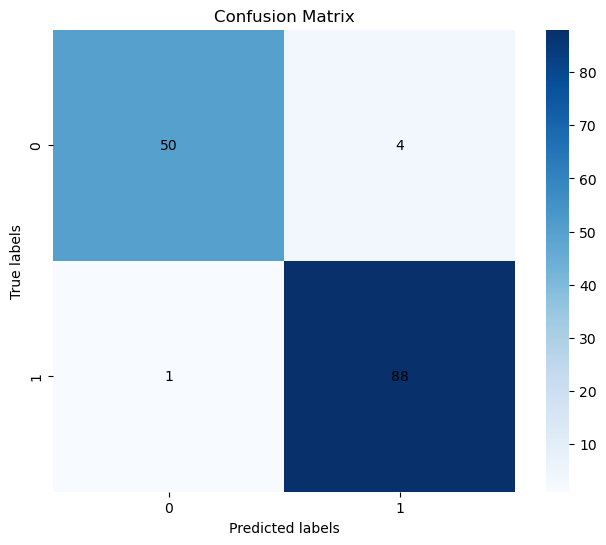

In [32]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, square=True, annot=False, cmap='Blues', cbar=True)

# Annotate each cell with the numeric value using matplotlib
ax = plt.gca()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j + 0.5, i + 0.5, cm[i, j], horizontalalignment='center', verticalalignment='center')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

- [x] What is KNN?
- [x] Breast Cancer Dataset
- [ ] How to use optimal K?

# How to choose a K value?

K value indicates the count of the nearest neighbors. We have to compute distances between test points and trained labels points. Updating distance metrics with every iteration is computationally expensive, and that’s why KNN is a lazy learning algorithm

<img src = "https://miro.medium.com/max/810/0*FakkqTKdMPDb3gof.jpg" width=40%>

## Optimal value of K

Manual tuning of K as a hyperparameter 

In [33]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

The line of code you're asking about is used to calculate and record the error rate of a k-Nearest Neighbors (k-NN) classifier for different values of `k` (the number of neighbors). Here’s a breakdown of what each part does:

1. **Comparison of Predictions with True Values**:
   ```python
   pred_i != y_test
   ```
   This part compares each prediction made by the k-NN classifier (`pred_i`) with the actual true labels (`y_test`). The result is a boolean array where `True` indicates a wrong prediction (an error), and `False` indicates a correct prediction.

2. **Calculating the Mean of Boolean Array**:
   ```python
   np.mean(pred_i != y_test)
   ```
   `numpy.mean()` computes the average of the array elements. When applied to a boolean array, `True` is treated as 1 and `False` as 0. Thus, calculating the mean of this boolean array effectively gives you the proportion of `True` values in the array, which is the error rate. In other words, it's the fraction of all predictions that were incorrect.

3. **Appending to the Error Rate List**:
   ```python
   error_rate.append(np.mean(pred_i != y_test))
   ```
   This adds the calculated error rate to the list `error_rate`. Each iteration of the loop (where `i` ranges from 1 to 40) corresponds to a different k-NN model with a different number of neighbors. For each model, the error rate is calculated and appended to the list. This list can later be used to analyze how the error rate changes as the number of neighbors varies.

The purpose of this loop and the line in question is typically to find an optimal value for `k` that minimizes the error rate, thereby enhancing the model's prediction accuracy. The list `error_rate` can be plotted against the values of `k` to visually identify the best choice for `k` in terms of prediction accuracy.

In [34]:
pred_i

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [35]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [36]:
error_rate

[0.06993006993006994,
 0.07692307692307693,
 0.06993006993006994,
 0.055944055944055944,
 0.03496503496503497,
 0.04895104895104895,
 0.04195804195804196,
 0.04195804195804196,
 0.04195804195804196,
 0.027972027972027972,
 0.02097902097902098,
 0.02097902097902098,
 0.027972027972027972,
 0.027972027972027972,
 0.03496503496503497,
 0.03496503496503497,
 0.03496503496503497,
 0.027972027972027972,
 0.03496503496503497,
 0.03496503496503497,
 0.03496503496503497,
 0.03496503496503497,
 0.03496503496503497,
 0.03496503496503497,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.04895104895104895,
 0.04895104895104895]

Text(0, 0.5, 'Error Rate')

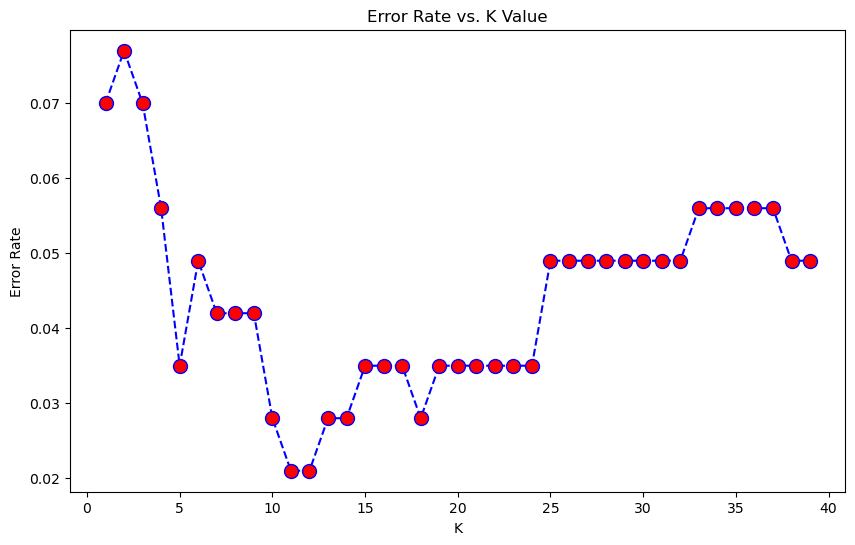

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [40]:
knn.score(X_train, y_train)

0.9342723004694836

In [41]:
knn.score(X_test, y_test)

0.9790209790209791